### First import necessary libraries

In [9]:
import numpy as np 
import pandas as pd
import os
import zipfile
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

## opening zip file and unzipp it

In [10]:
with zipfile.ZipFile('public_small_reports.zip', 'r') as zip_ref:
    print(f"Unzipping data...")
    zip_ref.extractall('public_small_reports')
    print(f"the directory is unzipped.")

Unzipping data...
the directory is unzipped.


### Select a random sample too see content of samples

In [2]:
random_sample = pd.read_json("public_small_reports/public_small_reports/fff0c440427a389e3d06ff8488cda21438fbd3fcba875fbd87e31ea0a65e889e.json")

In [3]:
random_sample

,behavior,static
summary,{'keys': ['HKEY_LOCAL_MACHINE\SOFTWARE\Microso...,NaN
pe,NaN,"{'icon_hash': None, 'sections': [{'raw_address..."


### For see details of json data import json libraries and pprint

In [46]:
from pprint import pprint
import json
json_data=open("public_small_reports/public_small_reports/fff0c440427a389e3d06ff8488cda21438fbd3fcba875fbd87e31ea0a65e889e.json")
jdata = json.load(json_data)

In [58]:
for i, value in jdata.items():
    print(f"{i}\n{value}")

behavior
{'summary': {'keys': ['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLEAUT', 'HKEY_LOCAL_MACHINE\\System\\CurrentControlSet\\Control\\Nls\\CustomLocale', 'HKEY_LOCAL_MACHINE\\SYSTEM\\ControlSet001\\Control\\Nls\\CustomLocale\\en-US', 'HKEY_LOCAL_MACHINE\\System\\CurrentControlSet\\Control\\Nls\\ExtendedLocale', 'HKEY_LOCAL_MACHINE\\SYSTEM\\ControlSet001\\Control\\Nls\\ExtendedLocale\\en-US', 'HKEY_LOCAL_MACHINE\\SYSTEM\\ControlSet001\\Control\\Nls\\Sorting\\Versions\\00060101.00060101', 'HKEY_LOCAL_MACHINE\\System\\CurrentControlSet\\Control\\Nls\\Locale', 'HKEY_LOCAL_MACHINE\\System\\CurrentControlSet\\Control\\Nls\\Locale\\Alternate Sorts', 'HKEY_LOCAL_MACHINE\\System\\CurrentControlSet\\Control\\Nls\\Language Groups', 'HKEY_LOCAL_MACHINE\\SYSTEM\\ControlSet001\\Control\\Nls\\Locale\\00000409', 'HKEY_LOCAL_MACHINE\\SYSTEM\\ControlSet001\\Control\\Nls\\Language Groups\\1', 'DisableUserModeCallbackFilter', 'HKEY_LOCAL_MACHINE\\Software\\Microsoft\\Windows\\Windows Error Reporting\

### take all json file's name for finding them's label's from `labels file`

In [57]:
import os

# folder path
dir_path = r'public_small_reports\\public_small_reports\\'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append((path.split('.'))[0])
print(res)

['0024359526087c2163f854bde00c56b590dcd240ce78333bdc088297d437432a', '00251270358ba7a88a4a6ed123c14c3220d00254de813778fc2a78ac5c585ebc', '00341062597b3c2f2c2ded1c6d49ac08d67cf705e463ccbb906b7d60a8e78f14', '00449061835238a7fe2435f2968076280454fdbc8a370978c6a6c5b90f95bd67', '006294229ffd0bc0d1ac06ef3235f89b7218ba0d98d6271def5faada406bf2bd', '00854773569ee8d9b719b54443b5d2387896530b8aefd428087737edd50977a8', '00909187884a81ef70309d2272ca5ea6f17a23927cc5ee926932465b1938df85', '010340969ed5f8c591c475a5717d6a75ecd9f9d85eab4b75399126f96fa2a940', '01109376a1cca76fb3407f7f5afd21f5a5c7fe875ab313eb5f4dd8d6e95fa759', '0111894422b08f0d879ba69587d94aaacb623b0ed8032553fc98288859dd0f9a', '01137543ba0a1573f51d69277af846032d6dd6d70e56c2d7cfc1f5199cecaf2a', '013175316dc3581a3b969c4026d68c804710e4502836a653a44f4c5a50da9e08', '014396320511ef51bfc1085f51f12b8d3f4a651b7eeef122f3f428e4892b66af', '01541869217abaa45a43b9cd419dc57a0f216e877109aefce9988cd1f03eac1b', '015531100b9f9f0e8fa3ec36238cc51146ecbb9671ede5

### Feature engreening and extract most important and valuable features based on what in guidance file saied.

In [14]:
import os
import pandas as pd
import json

# Path to the directory containing your JSON files
json_directory = 'public_small_reports/public_small_reports/'

# List to store DataFrames from each file
dfs = []

# Iterate through each file in the directory
for filename in os.listdir(json_directory):
    if filename.endswith('.json'):
        file_path = os.path.join(json_directory, filename)

        # Read JSON file
        with open(file_path, 'r') as file:
            json_data = json.load(file)

        # Extract 'behavior' and 'static' features
        behavior_data = json_data.get('behavior', {}).get('summary', {})
        static_data = json_data.get('static', {}).get('pe', {})

        # Combine the features into a single dictionary
        combined_data = {**behavior_data, **static_data, 'name': json_data.get('name'), 'version': json_data.get('version')}

        # Convert the combined dictionary to a DataFrame
        df = pd.DataFrame([combined_data])

        # Append DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Display the final DataFrame
print(final_df)

       Unnamed: 0                                               keys  \
0               0  ['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...   
1               1  ['HKEY_CURRENT_USER', 'DisableUserModeCallback...   
2               2  ['HKEY_LOCAL_MACHINE\\SYSTEM\\CurrentControlSe...   
3               3  ['HKEY_LOCAL_MACHINE\\Software\\Microsoft\\Win...   
4               4  ['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...   
...           ...                                                ...   
20018       20018  ['HKEY_CURRENT_USER', 'HKEY_LOCAL_MACHINE\\SOF...   
20019       20019  ['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...   
20020       20020  ['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...   
20021       20021  ['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...   
20022       20022  ['HKEY_LOCAL_MACHINE\\System\\CurrentControlSe...   

                                           resolved_apis  \
0      ['kernel32.dll.IsProcessorFeaturePresent', 'ke...   
1      ['kernel

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20023 entries, 0 to 20022
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20023 non-null  int64  
 1   keys                20023 non-null  object 
 2   resolved_apis       20023 non-null  object 
 3   executed_commands   20023 non-null  object 
 4   write_keys          20023 non-null  object 
 5   files               20023 non-null  object 
 6   read_files          20023 non-null  object 
 7   started_services    20023 non-null  object 
 8   created_services    20023 non-null  object 
 9   write_files         20023 non-null  object 
 10  delete_keys         20023 non-null  object 
 11  read_keys           20023 non-null  object 
 12  delete_files        20023 non-null  object 
 13  mutexes             20023 non-null  object 
 14  icon_hash           3710 non-null   object 
 15  sections            19387 non-null  object 
 16  peid

## save file for working with it later

In [61]:
final_df.to_csv("final_df_train.csv")

In [19]:
final_df = pd.read_csv("final_df_train.csv")
final_df = final_df.drop("Unnamed: 0", axis=1)
final_df.head()

,keys,resolved_apis,executed_commands,write_keys,files,read_files,started_services,created_services,write_files,delete_keys,...,versioninfo,resources,pdbpath,osversion,icon_fuzzy,imagebase,imported_dll_count,timestamp,name,version
0,['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...,"['kernel32.dll.IsProcessorFeaturePresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['HKEY_CURRENT_USER\\Software\\VB and VBA Prog...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\~DFC4...,[],...,[],"[{'name': 'RT_ICON', 'filetype': None, 'offset...",NaN,4.0,NaN,0x00400000,1.0,2011-06-14 19:01:16,NaN,NaN
1,"['HKEY_CURRENT_USER', 'DisableUserModeCallback...","['kernel32.dll.FlsAlloc', 'kernel32.dll.FlsGet...","['--81893142', 'C:\\Users\\comp\\AppData\\Loca...",[],['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],[],[],...,[],"[{'name': 'RT_ICON', 'filetype': None, 'offset...",NaN,5.0,NaN,0x00400000,8.0,2019-03-20 06:24:32,NaN,NaN
2,['HKEY_LOCAL_MACHINE\\SYSTEM\\CurrentControlSe...,"['kernel32.dll.GetNativeSystemInfo', 'kernel32...","['""C:\\Users\\comp\\AppData\\Local\\Temp\\0034...",[],['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Microsoft\\...,[],...,[],"[{'name': 'RT_DIALOG', 'filetype': None, 'offs...",NaN,5.0,NaN,0x00400000,7.0,2018-07-03 21:30:14,NaN,NaN
3,['HKEY_LOCAL_MACHINE\\Software\\Microsoft\\Win...,"['lpk.dll.LpkEditControl', 'kernel32.dll.FlsAl...","['""C:\\Users\\comp\\AppData\\Local\\Temp\\h21v...",['HKEY_CURRENT_USER\\Software\\Microsoft\\Wind...,"['C:\\Windows\\WindowsShell.Manifest', '\\Devi...","['C:\\Windows\\WindowsShell.Manifest', '\\Devi...",[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\h21vn...,['HKEY_CURRENT_USER\\Software\\Microsoft\\Wind...,...,[],"[{'name': 'RT_ICON', 'filetype': None, 'offset...",NaN,5.1,NaN,0x00400000,18.0,2019-03-02 11:55:27,NaN,NaN
4,['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...,"['kernel32.dll.IsProcessorFeaturePresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['HKEY_CURRENT_USER\\Software\\VB and VBA Prog...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\~DF1A...,[],...,[],"[{'name': 'RT_ICON', 'filetype': None, 'offset...",NaN,4.0,NaN,0x00400000,1.0,2011-06-14 19:01:16,NaN,NaN


In [11]:
labels_df = pd.read_csv("public_labels.csv")
labels_df.head()

,sha256,classification_family,classification_type,date
0,00003d128a7eb859f65f5780d8fa2b5e52d472665678bf...,Qakbot,banker,2019-03-20
1,0000698621e473a0828c1c957873e7d086f2d90eebc6a3...,Swisyn,trojan,2019-11-16
2,0000a65749f5902c4d82ffa701198038f0b4870b00a27c...,Qakbot,banker,2018-06-25
3,0001770a2a6e888a123775fc24d8a4ffccc5c8191c1c2a...,Emotet,banker,2019-10-06
4,000376a4b234f57ae0f1fb959817486040d7d8d8be1fbc...,Emotet,banker,2019-09-30


In [20]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48976 entries, 0 to 48975
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sha256                 48976 non-null  object
 1   classification_family  48976 non-null  object
 2   classification_type    48976 non-null  object
 3   date                   48976 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [24]:
### lets look at the file names
res

['0024359526087c2163f854bde00c56b590dcd240ce78333bdc088297d437432a.json',
 '00251270358ba7a88a4a6ed123c14c3220d00254de813778fc2a78ac5c585ebc.json',
 '00341062597b3c2f2c2ded1c6d49ac08d67cf705e463ccbb906b7d60a8e78f14.json',
 '00449061835238a7fe2435f2968076280454fdbc8a370978c6a6c5b90f95bd67.json',
 '006294229ffd0bc0d1ac06ef3235f89b7218ba0d98d6271def5faada406bf2bd.json',
 '00854773569ee8d9b719b54443b5d2387896530b8aefd428087737edd50977a8.json',
 '00909187884a81ef70309d2272ca5ea6f17a23927cc5ee926932465b1938df85.json',
 '010340969ed5f8c591c475a5717d6a75ecd9f9d85eab4b75399126f96fa2a940.json',
 '01109376a1cca76fb3407f7f5afd21f5a5c7fe875ab313eb5f4dd8d6e95fa759.json',
 '0111894422b08f0d879ba69587d94aaacb623b0ed8032553fc98288859dd0f9a.json',
 '01137543ba0a1573f51d69277af846032d6dd6d70e56c2d7cfc1f5199cecaf2a.json',
 '013175316dc3581a3b969c4026d68c804710e4502836a653a44f4c5a50da9e08.json',
 '014396320511ef51bfc1085f51f12b8d3f4a651b7eeef122f3f428e4892b66af.json',
 '01541869217abaa45a43b9cd419dc57a0f21

In [58]:
## add file names to final_df that is our input data to model
final_df['sha256'] = res

In [59]:
final_df['sha256'][0]

'0024359526087c2163f854bde00c56b590dcd240ce78333bdc088297d437432a'

In [34]:
# some preprocessing on dataframe 
final_df = final_df.drop(['name', 'version'], axis=1)  ## all values of these columns are NaN
final_df = final_df.fillna(0)

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20023 entries, 0 to 20022
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   keys                20023 non-null  object 
 1   resolved_apis       20023 non-null  object 
 2   executed_commands   20023 non-null  object 
 3   write_keys          20023 non-null  object 
 4   files               20023 non-null  object 
 5   read_files          20023 non-null  object 
 6   started_services    20023 non-null  object 
 7   created_services    20023 non-null  object 
 8   write_files         20023 non-null  object 
 9   delete_keys         20023 non-null  object 
 10  read_keys           20023 non-null  object 
 11  delete_files        20023 non-null  object 
 12  mutexes             20023 non-null  object 
 13  icon_hash           20023 non-null  object 
 14  sections            20023 non-null  object 
 15  peid_signatures     20023 non-null  float64
 16  entr

In [61]:
labels_df

,sha256,classification_family,classification_type,date
0,00003d128a7eb859f65f5780d8fa2b5e52d472665678bf...,Qakbot,banker,2019-03-20
1,0000698621e473a0828c1c957873e7d086f2d90eebc6a3...,Swisyn,trojan,2019-11-16
2,0000a65749f5902c4d82ffa701198038f0b4870b00a27c...,Qakbot,banker,2018-06-25
3,0001770a2a6e888a123775fc24d8a4ffccc5c8191c1c2a...,Emotet,banker,2019-10-06
4,000376a4b234f57ae0f1fb959817486040d7d8d8be1fbc...,Emotet,banker,2019-09-30
...,...,...,...,...
48971,fff961de120a9d33ae89f388c9beefb05512ae184790fa...,Emotet,banker,2019-11-06
48972,fffb12d0e2fd0990f566967c675334ab0fc5c6517fa242...,Swisyn,trojan,2019-01-21
48973,fffd121f7525c842f77afee7a6b14b1b12b4255b890746...,Qakbot,banker,2019-04-17
48974,fffd75443ecb5143bf4ba0b66b3c34d6a465fd9a6e8bbd...,Qakbot,banker,2019-05-06


In [62]:
final_df['sha256'][10]

'01137543ba0a1573f51d69277af846032d6dd6d70e56c2d7cfc1f5199cecaf2a'

In [63]:
labels_df[labels_df['sha256'] == '01137543ba0a1573f51d69277af846032d6dd6d70e56c2d7cfc1f5199cecaf2a']

,sha256,classification_family,classification_type,date
244,01137543ba0a1573f51d69277af846032d6dd6d70e56c2...,njRAT,rat,2018-10-02


In [67]:
# join the dataframes on the 'key' column
merged_df = pd.merge(final_df, labels_df, on='sha256')
merged_df.head()

,keys,resolved_apis,executed_commands,write_keys,files,read_files,started_services,created_services,write_files,delete_keys,...,pdbpath,osversion,icon_fuzzy,imagebase,imported_dll_count,timestamp,sha256,classification_family,classification_type,date
0,['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...,"['kernel32.dll.IsProcessorFeaturePresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['HKEY_CURRENT_USER\\Software\\VB and VBA Prog...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\~DFC4...,[],...,0,4.0,0,0x00400000,1.0,2011-06-14 19:01:16,0024359526087c2163f854bde00c56b590dcd240ce7833...,Swisyn,trojan,2019-09-14
1,"['HKEY_CURRENT_USER', 'DisableUserModeCallback...","['kernel32.dll.FlsAlloc', 'kernel32.dll.FlsGet...","['--81893142', 'C:\\Users\\comp\\AppData\\Loca...",[],['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],[],[],...,0,5.0,0,0x00400000,8.0,2019-03-20 06:24:32,00251270358ba7a88a4a6ed123c14c3220d00254de8137...,Emotet,banker,2019-03-20
2,['HKEY_LOCAL_MACHINE\\SYSTEM\\CurrentControlSe...,"['kernel32.dll.GetNativeSystemInfo', 'kernel32...","['""C:\\Users\\comp\\AppData\\Local\\Temp\\0034...",[],['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Microsoft\\...,[],...,0,5.0,0,0x00400000,7.0,2018-07-03 21:30:14,00341062597b3c2f2c2ded1c6d49ac08d67cf705e463cc...,Emotet,banker,2018-07-03
3,['HKEY_LOCAL_MACHINE\\Software\\Microsoft\\Win...,"['lpk.dll.LpkEditControl', 'kernel32.dll.FlsAl...","['""C:\\Users\\comp\\AppData\\Local\\Temp\\h21v...",['HKEY_CURRENT_USER\\Software\\Microsoft\\Wind...,"['C:\\Windows\\WindowsShell.Manifest', '\\Devi...","['C:\\Windows\\WindowsShell.Manifest', '\\Devi...",[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\h21vn...,['HKEY_CURRENT_USER\\Software\\Microsoft\\Wind...,...,0,5.1,0,0x00400000,18.0,2019-03-02 11:55:27,00449061835238a7fe2435f2968076280454fdbc8a3709...,njRAT,rat,2019-08-04
4,['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...,"['kernel32.dll.IsProcessorFeaturePresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['HKEY_CURRENT_USER\\Software\\VB and VBA Prog...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\~DF1A...,[],...,0,4.0,0,0x00400000,1.0,2011-06-14 19:01:16,006294229ffd0bc0d1ac06ef3235f89b7218ba0d98d627...,Swisyn,trojan,2019-02-26


In [66]:
merged_df[merged_df['sha256'] == '01137543ba0a1573f51d69277af846032d6dd6d70e56c2d7cfc1f5199cecaf2a']

,keys,resolved_apis,executed_commands,write_keys,files,read_files,started_services,created_services,write_files,delete_keys,...,pdbpath,osversion,icon_fuzzy,imagebase,imported_dll_count,timestamp,sha256,classification_family,classification_type,date
10,"['HKEY_CURRENT_USER', 'DisableUserModeCallback...","['kernel32.dll.FlsAlloc', 'kernel32.dll.FlsGet...",[],[],['C:\\Users\\comp\\AppData\\Roaming\\RestartAp...,['C:\\Users\\comp\\AppData\\Local\\Temp\\skdi1...,[],[],['\\??\\PhysicalDrive0'],[],...,0,4.0,0,0x00400000,2.0,2018-10-02 01:43:13,01137543ba0a1573f51d69277af846032d6dd6d70e56c2...,njRAT,rat,2018-10-02


In [ ]:
merged_df.to_csv("merged_df.csv")

In [25]:
merged_df = pd.read_csv("merged_df.csv")
merged_df = merged_df.drop('Unnamed: 0', axis=1)
merged_df.head()

,keys,resolved_apis,executed_commands,write_keys,files,read_files,started_services,created_services,write_files,delete_keys,...,pdbpath,osversion,icon_fuzzy,imagebase,imported_dll_count,timestamp,sha256,classification_family,classification_type,date
0,['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...,"['kernel32.dll.IsProcessorFeaturePresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['HKEY_CURRENT_USER\\Software\\VB and VBA Prog...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\~DFC4...,[],...,0,4.0,0,0x00400000,1.0,2011-06-14 19:01:16,0024359526087c2163f854bde00c56b590dcd240ce7833...,Swisyn,trojan,2019-09-14
1,"['HKEY_CURRENT_USER', 'DisableUserModeCallback...","['kernel32.dll.FlsAlloc', 'kernel32.dll.FlsGet...","['--81893142', 'C:\\Users\\comp\\AppData\\Loca...",[],['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],[],[],...,0,5.0,0,0x00400000,8.0,2019-03-20 06:24:32,00251270358ba7a88a4a6ed123c14c3220d00254de8137...,Emotet,banker,2019-03-20
2,['HKEY_LOCAL_MACHINE\\SYSTEM\\CurrentControlSe...,"['kernel32.dll.GetNativeSystemInfo', 'kernel32...","['""C:\\Users\\comp\\AppData\\Local\\Temp\\0034...",[],['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Microsoft\\...,[],...,0,5.0,0,0x00400000,7.0,2018-07-03 21:30:14,00341062597b3c2f2c2ded1c6d49ac08d67cf705e463cc...,Emotet,banker,2018-07-03
3,['HKEY_LOCAL_MACHINE\\Software\\Microsoft\\Win...,"['lpk.dll.LpkEditControl', 'kernel32.dll.FlsAl...","['""C:\\Users\\comp\\AppData\\Local\\Temp\\h21v...",['HKEY_CURRENT_USER\\Software\\Microsoft\\Wind...,"['C:\\Windows\\WindowsShell.Manifest', '\\Devi...","['C:\\Windows\\WindowsShell.Manifest', '\\Devi...",[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\h21vn...,['HKEY_CURRENT_USER\\Software\\Microsoft\\Wind...,...,0,5.1,0,0x00400000,18.0,2019-03-02 11:55:27,00449061835238a7fe2435f2968076280454fdbc8a3709...,njRAT,rat,2019-08-04
4,['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...,"['kernel32.dll.IsProcessorFeaturePresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['HKEY_CURRENT_USER\\Software\\VB and VBA Prog...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\~DF1A...,[],...,0,4.0,0,0x00400000,1.0,2011-06-14 19:01:16,006294229ffd0bc0d1ac06ef3235f89b7218ba0d98d627...,Swisyn,trojan,2019-02-26


In [4]:
merged_df.columns

Index(['keys', 'resolved_apis', 'executed_commands', 'write_keys', 'files',
       'read_files', 'started_services', 'created_services', 'write_files',
       'delete_keys', 'read_keys', 'delete_files', 'mutexes', 'icon_hash',
       'sections', 'peid_signatures', 'entrypoint', 'exports', 'overlay',
       'digital_signers', 'imphash', 'reported_checksum', 'icon',
       'guest_signers', 'actual_checksum', 'imports', 'exported_dll_name',
       'dirents', 'versioninfo', 'resources', 'pdbpath', 'osversion',
       'icon_fuzzy', 'imagebase', 'imported_dll_count', 'timestamp', 'sha256',
       'classification_family', 'classification_type', 'date'],
      dtype='object')

In [5]:
# Lets see the targets
merged_df['classification_family'].unique()

array(['Swisyn', 'Emotet', 'njRAT', 'Zeus', 'Qakbot', 'Ursnif',
       'Trickbot', 'Lokibot', 'HarHar', 'Adload'], dtype=object)

In [6]:
merged_df['classification_type'].unique()

array(['trojan', 'banker', 'rat', 'pws', 'coinminer', 'keylogger'],
      dtype=object)

In [10]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
input_data = merged_df.drop(['sha256', 'classification_family', 'classification_type',
                             'date', 'timestamp'], axis=1)
input_data

,keys,resolved_apis,executed_commands,write_keys,files,read_files,started_services,created_services,write_files,delete_keys,...,imports,exported_dll_name,dirents,versioninfo,resources,pdbpath,osversion,icon_fuzzy,imagebase,imported_dll_count
0,['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...,"['kernel32.dll.IsProcessorFeaturePresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['HKEY_CURRENT_USER\\Software\\VB and VBA Prog...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\~DFC4...,[],...,"[{'dll': 'MSVBVM60.DLL', 'imports': [{'name': ...",0,"[{'name': 'IMAGE_DIRECTORY_ENTRY_EXPORT', 'vir...",[],"[{'name': 'RT_ICON', 'filetype': None, 'offset...",0,4.0,0,0x00400000,1.0
1,"['HKEY_CURRENT_USER', 'DisableUserModeCallback...","['kernel32.dll.FlsAlloc', 'kernel32.dll.FlsGet...","['--81893142', 'C:\\Users\\comp\\AppData\\Loca...",[],['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],[],[],...,"[{'dll': 'KERNEL32.dll', 'imports': [{'name': ...",0,"[{'name': 'IMAGE_DIRECTORY_ENTRY_EXPORT', 'vir...",[],"[{'name': 'RT_ICON', 'filetype': None, 'offset...",0,5.0,0,0x00400000,8.0
2,['HKEY_LOCAL_MACHINE\\SYSTEM\\CurrentControlSe...,"['kernel32.dll.GetNativeSystemInfo', 'kernel32...","['""C:\\Users\\comp\\AppData\\Local\\Temp\\0034...",[],['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Microsoft\\...,[],...,"[{'dll': 'USER32.dll', 'imports': [{'name': 'E...",0,"[{'name': 'IMAGE_DIRECTORY_ENTRY_EXPORT', 'vir...",[],"[{'name': 'RT_DIALOG', 'filetype': None, 'offs...",0,5.0,0,0x00400000,7.0
3,['HKEY_LOCAL_MACHINE\\Software\\Microsoft\\Win...,"['lpk.dll.LpkEditControl', 'kernel32.dll.FlsAl...","['""C:\\Users\\comp\\AppData\\Local\\Temp\\h21v...",['HKEY_CURRENT_USER\\Software\\Microsoft\\Wind...,"['C:\\Windows\\WindowsShell.Manifest', '\\Devi...","['C:\\Windows\\WindowsShell.Manifest', '\\Devi...",[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\h21vn...,['HKEY_CURRENT_USER\\Software\\Microsoft\\Wind...,...,"[{'dll': 'WSOCK32.dll', 'imports': [{'name': '...",0,"[{'name': 'IMAGE_DIRECTORY_ENTRY_EXPORT', 'vir...",[],"[{'name': 'RT_ICON', 'filetype': None, 'offset...",0,5.1,0,0x00400000,18.0
4,['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...,"['kernel32.dll.IsProcessorFeaturePresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['HKEY_CURRENT_USER\\Software\\VB and VBA Prog...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\~DF1A...,[],...,"[{'dll': 'MSVBVM60.DLL', 'imports': [{'name': ...",0,"[{'name': 'IMAGE_DIRECTORY_ENTRY_EXPORT', 'vir...",[],"[{'name': 'RT_ICON', 'filetype': None, 'offset...",0,4.0,0,0x00400000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20018,"['HKEY_CURRENT_USER', 'HKEY_LOCAL_MACHINE\\SOF...","['kernel32.dll.FlsAlloc', 'kernel32.dll.FlsGet...","['--649f3207', 'C:\\Users\\comp\\AppData\\Loca...",['HKEY_CURRENT_USER\\Software\\Microsoft\\Wind...,['C:\\Users\\comp\\AppData\\Local\\Temp\\FFF96...,['C:\\Users\\comp\\AppData\\Local\\Temp\\FFF96...,[],[],['C:\\Users\\comp\\AppData\\Local\\cplfsi\\cpl...,[],...,"[{'dll': 'KERNEL32.dll', 'imports': [{'name': ...",diblook.exe,"[{'name': 'IMAGE_DIRECTORY_ENTRY_EXPORT', 'vir...",[],"[{'name': 'RT_CURSOR', 'filetype': None, 'offs...",0,4.0,1093d28939b3583ee1a03453748ed62d,0x00400000,11.0
20019,['HKEY_LOCAL_MACHINE\\SOFTWARE\\Microsoft\\OLE...,"['kernel32.dll.IsProcessorFeaturePresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['HKEY_CURRENT_USER\\Software\\VB and VBA Prog...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,['C:\\Windows\\Globalization\\Sorting\\sortdef...,[],[],['C:\\Users\\comp\\AppData\\Local\\Temp\\~DF62...,[],...,"[{'dll': 'MSVBVM60.DLL', 'imports': [{'name': ...",0,"[{'

In [9]:
# convert all texts to lowercase in input data

In [10]:
for i in input_data:
    print(i)
    input_data[i] = input_data[i].astype(str).str.lower()

keys
resolved_apis
executed_commands
write_keys
files
read_files
started_services
created_services
write_files
delete_keys
read_keys
delete_files
mutexes
icon_hash
sections
peid_signatures
entrypoint
exports
overlay
digital_signers
imphash
reported_checksum
icon
guest_signers
actual_checksum
imports
exported_dll_name
dirents
versioninfo
resources
pdbpath
osversion
icon_fuzzy
imagebase
imported_dll_count


In [ ]:
# for i in input_data:
#     input_data['result'] += input_data[i]

In [18]:
input_data['result'] = input_data['keys'] + ' ' + input_data['resolved_apis'] + ' '  + input_data['executed_commands'] + ' '  + input_data['write_keys'] + ' '  + input_data['files']\
+ ' '  + input_data['read_files'] + ' '  + input_data['started_services'] + ' '  + input_data['created_services']\
+ ' ' + input_data['write_files'] + ' '  + input_data['delete_keys'] + ' '  + input_data['read_keys'] + ' '  + input_data['delete_files'] + ' ' + input_data['mutexes']\
+ ' ' + input_data['icon_hash'] + ' ' + input_data['sections'] + ' ' + input_data['peid_signatures'] + ' ' + input_data['entrypoint'] + ' ' + input_data['exports']\
+ ' ' + input_data['overlay'] + ' ' + input_data['digital_signers'] + ' ' + input_data['imphash'] + ' ' + input_data['reported_checksum'] + ' ' + input_data['icon']\
+ ' ' + input_data['guest_signers'] + ' ' + input_data['actual_checksum'] + ' ' + input_data['imports'] + ' ' + input_data['exported_dll_name'] + ' ' + input_data['dirents']\
+ ' ' + input_data['versioninfo'] + ' ' + input_data['resources'] + ' ' + input_data['pdbpath'] + ' ' + input_data['osversion'] + ' ' + input_data['icon_fuzzy']\
+ ' ' + input_data['imagebase'] + ' ' + input_data['imported_dll_count']

In [20]:
input_data.to_csv("input_data.csv")

In [2]:
input_data = pd.read_csv("input_data.csv")
input_data = input_data.drop('Unnamed: 0', axis=1)
input_data.head()

,keys,resolved_apis,executed_commands,write_keys,files,read_files,started_services,created_services,write_files,delete_keys,...,exported_dll_name,dirents,versioninfo,resources,pdbpath,osversion,icon_fuzzy,imagebase,imported_dll_count,result
0,['hkey_local_machine\\software\\microsoft\\ole...,"['kernel32.dll.isprocessorfeaturepresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['hkey_current_user\\software\\vb and vba prog...,['c:\\windows\\globalization\\sorting\\sortdef...,['c:\\windows\\globalization\\sorting\\sortdef...,[],[],['c:\\users\\comp\\appdata\\local\\temp\\~dfc4...,[],...,0,"[{'name': 'image_directory_entry_export', 'vir...",[],"[{'name': 'rt_icon', 'filetype': none, 'offset...",0,4.0,0,0x00400000,1.0,['hkey_local_machine\\software\\microsoft\\ole...
1,"['hkey_current_user', 'disableusermodecallback...","['kernel32.dll.flsalloc', 'kernel32.dll.flsget...","['--81893142', 'c:\\users\\comp\\appdata\\loca...",[],['c:\\windows\\globalization\\sorting\\sortdef...,['c:\\windows\\globalization\\sorting\\sortdef...,[],[],[],[],...,0,"[{'name': 'image_directory_entry_export', 'vir...",[],"[{'name': 'rt_icon', 'filetype': none, 'offset...",0,5.0,0,0x00400000,8.0,"['hkey_current_user', 'disableusermodecallback..."
2,['hkey_local_machine\\system\\currentcontrolse...,"['kernel32.dll.getnativesysteminfo', 'kernel32...","['""c:\\users\\comp\\appdata\\local\\temp\\0034...",[],['c:\\windows\\globalization\\sorting\\sortdef...,['c:\\windows\\globalization\\sorting\\sortdef...,[],[],['c:\\users\\comp\\appdata\\local\\microsoft\\...,[],...,0,"[{'name': 'image_directory_entry_export', 'vir...",[],"[{'name': 'rt_dialog', 'filetype': none, 'offs...",0,5.0,0,0x00400000,7.0,['hkey_local_machine\\system\\currentcontrolse...
3,['hkey_local_machine\\software\\microsoft\\win...,"['lpk.dll.lpkeditcontrol', 'kernel32.dll.flsal...","['""c:\\users\\comp\\appdata\\local\\temp\\h21v...",['hkey_current_user\\software\\microsoft\\wind...,"['c:\\windows\\windowsshell.manifest', '\\devi...","['c:\\windows\\windowsshell.manifest', '\\devi...",[],[],['c:\\users\\comp\\appdata\\local\\temp\\h21vn...,['hkey_current_user\\software\\microsoft\\wind...,...,0,"[{'name': 'image_directory_entry_export', 'vir...",[],"[{'name': 'rt_icon', 'filetype': none, 'offset...",0,5.1,0,0x00400000,18.0,['hkey_local_machine\\software\\microsoft\\win...
4,['hkey_local_machine\\software\\microsoft\\ole...,"['kernel32.dll.isprocessorfeaturepresent', 'ke...",['c:\\windows\\system\\explorer.exe'],['hkey_current_user\\software\\vb and vba prog...,['c:\\windows\\globalization\\sorting\\sortdef...,['c:\\windows\\globalization\\sorting\\sortdef...,[],[],['c:\\users\\comp\\appdata\\local\\temp\\~df1a...,[],...,0,"[{'name': 'image_directory_entry_export', 'vir...",[],"[{'name': 'rt_icon', 'filetype': none, 'offset...",0,4.0,0,0x00400000,1.0,['hkey_local_machine\\software\\microsoft\\ole...


In [11]:
input_data1 = input_data[['result']]

In [12]:
input_data1.head()

,result
0,['hkey_local_machine\\software\\microsoft\\ole...
1,"['hkey_current_user', 'disableusermodecallback..."
2,['hkey_local_machine\\system\\currentcontrolse...
3,['hkey_local_machine\\software\\microsoft\\win...
4,['hkey_local_machine\\software\\microsoft\\ole...


In [13]:
import string
input_data1['result'] = input_data1['result'].str.translate(str.maketrans('', '', string.punctuation))

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nima\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
input_data1['result'] = input_data1['result'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nima\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

input_data1['result'] = input_data1['result'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [30]:
vectorizer = CountVectorizer()

# Vectorize the training data
vectorized_data = vectorizer.fit_transform(input_data1['result'])

In [54]:
print(vectorized_data)

  (0, 550580)	1
  (0, 582126)	1
  (0, 580064)	2
  (0, 582127)	1
  (0, 580456)	2
  (0, 580947)	2
  (0, 582129)	1
  (0, 582130)	1
  (0, 611374)	1
  (0, 582128)	1
  (0, 518492)	1
  (0, 580740)	2
  (0, 580730)	2
  (0, 518494)	2
  (0, 496374)	2
  (0, 568384)	1
  (0, 498993)	4
  (0, 607189)	1
  (0, 574940)	2
  (0, 607190)	2
  (0, 580955)	2
  (0, 589393)	2
  (0, 582125)	1
  (0, 579894)	2
  (0, 579912)	2
  :	:
  (20022, 585581)	1
  (20022, 382276)	2
  (20022, 293280)	1
  (20022, 4468)	1
  (20022, 507)	1
  (20022, 2517)	2
  (20022, 604666)	1
  (20022, 604655)	1
  (20022, 705)	1
  (20022, 13277)	1
  (20022, 583534)	1
  (20022, 604760)	1
  (20022, 24902)	1
  (20022, 2935)	1
  (20022, 7471)	1
  (20022, 9557)	1
  (20022, 29811)	1
  (20022, 14667)	1
  (20022, 16344)	1
  (20022, 567742)	1
  (20022, 603599)	2
  (20022, 444066)	5
  (20022, 6958)	1
  (20022, 89740)	1
  (20022, 296630)	1


In [106]:
labels = merged_df[['classification_type']]

In [107]:
labels

,classification_type
0,trojan
1,banker
2,banker
3,rat
4,trojan
...,...
20018,banker
20019,trojan
20020,banker
20021,banker


In [115]:
colors = labels['classification_type'].unique()

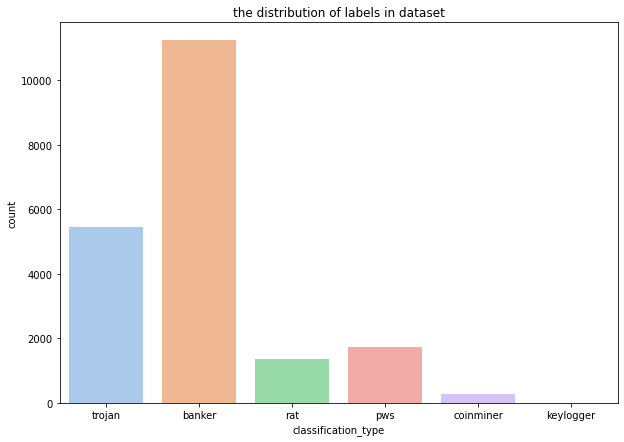

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.countplot(data=labels, x='classification_type', palette='pastel')
plt.title("the distribution of labels in dataset");

In [135]:
labels['classification_type'].unique()

array(['trojan', 'banker', 'rat', 'pws', 'coinminer', 'keylogger'],
      dtype=object)

In [136]:
def make_labels_to_int(column):
    if column == 'trojan':
        return 1
    elif column =='banker':
        return 2
    elif column == 'rat':
        return 3
    elif column == 'pws':
        return 4
    elif column == 'coinminer':
        return 5
    else:
        return 6

labels = labels['classification_type'].apply(make_labels_to_int)

In [126]:
# import libraries for calculate the accuracy and score of models also with classification report we can see what classes predicted corrected and what are them predicted wrong
from sklearn.metrics import accuracy_score, classification_report

In [137]:
# see sizes of labels and vectorized_data for sure sizes is correct 
labels.size, vectorized_data

(20023,
 <20023x618552 sparse matrix of type '<class 'numpy.int64'>'
 	with 20866936 stored elements in Compressed Sparse Row format>)

In [144]:
# split data to train and test to test models, we keep last 400 record for test model 
X_train, y_train = vectorized_data[:-400], labels[:-400]
X_test, y_test = vectorized_data[-400:], labels[-400:]

In [145]:
# for sure all classes be in train and test datas
y_train.unique(), y_test.unique()

(array([1, 2, 3, 4, 5, 6], dtype=int64), array([2, 4, 1, 5, 3], dtype=int64))

In [146]:
X_train, y_train.size

(<19623x618552 sparse matrix of type '<class 'numpy.int64'>'
 	with 20464371 stored elements in Compressed Sparse Row format>,
 19623)

In [147]:
# import first model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

In [148]:
# see the accuracy of naive bayes model 
y_preds_naive_bayes = clf.predict(X_test)
accuracy_score(y_test, y_preds_naive_bayes)

0.935

In [150]:
# see classification report, it is obviously that predicting classes 3 and 4 is a bit more difficult with this model
print(classification_report(y_test, y_preds_naive_bayes))

              precision    recall  f1-score   support

           1       0.92      0.94      0.93       100
           2       0.98      0.95      0.96       241
           3       0.75      0.91      0.82        23
           4       0.79      0.84      0.82        32
           5       1.00      1.00      1.00         4

    accuracy                           0.94       400
   macro avg       0.89      0.93      0.91       400
weighted avg       0.94      0.94      0.94       400



In [151]:
from sklearn.neighbors import KNeighborsClassifier
clf_neighbours = KNeighborsClassifier().fit(X_train, y_train)

In [152]:
y_preds_neighbors = clf_neighbours.predict(X_test)
accuracy_score(y_test, y_preds_neighbors)

0.9875

In [154]:
# this model works better in all classes specially in clasess 3 and 4 which previous model cant predict
print(classification_report(y_test, y_preds_neighbors))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       1.00      0.99      0.99       241
           3       0.96      0.96      0.96        23
           4       0.94      0.97      0.95        32
           5       0.80      1.00      0.89         4

    accuracy                           0.99       400
   macro avg       0.94      0.98      0.96       400
weighted avg       0.99      0.99      0.99       400



In [155]:
from sklearn.ensemble import RandomForestClassifier
clf_randomforrest = RandomForestClassifier() # we can also use hyperparameters for improve the accuracy but doesn't need
clf_randomforrest.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
y_preds_randomforrest = clf_randomforrest.predict(X_test)
accuracy_score(y_test, y_preds_randomforrest)

0.9925

In [157]:
# also we can see random forrest model is also have a great result and can predict well all classes.
print(classification_report(y_test, y_preds_randomforrest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       241
           3       0.96      0.96      0.96        23
           4       0.97      0.97      0.97        32
           5       1.00      1.00      1.00         4

    accuracy                           0.99       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400



#### best model that predicts well our test data is random forrest classifier with 99% of accuraccy
#### also k neighbours classifier is also have good result and good reports with precision, recall, f1-score